In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Refs:
# - Martinod+ 2021 Applied Optics 60(19), Appendix A
# - Klinner-Teo, thesis

# 1 directional coupler, no photometric tap

In [36]:
# 1 flux value only

# transfer matrix of 
# 1 directional coupler, no photometric tap (Klinner-Teo, Eqn. 2.1)

phase_shift = -np.pi/2. # induced by transfer from one waveguide to the other; assumed achromatic (WHAT DOES - SIGN MEAN, PHYSICALLY? IS TERM SYMMETRIC?)
phase_term = np.exp(1j * phase_shift) # for matrix

T_dir = np.sqrt(1./2.) * np.array([[1,          phase_term], 
                                   [phase_term, 1           ]])

# output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, phasor_right])

flux_output = np.abs(np.dot(T_dir, a_in))**2

print(flux_output)

[1. 1.]


In [37]:
# series of flux values, as fcn of input phase

# transfer matrix of 
# 1 directional coupler, no photometric tap (Klinner-Teo, Eqn. 2.1)

phase_shift = -np.pi/2. # induced by transfer from one waveguide to the other; assumed achromatic (WHAT DOES - SIGN MEAN, PHYSICALLY? IS TERM SYMMETRIC?)
phase_term = np.exp(1j * phase_shift) # for matrix

T_dir = np.sqrt(1./2.) * np.array([[1,          phase_term], 
                                   [phase_term, 1           ]])

# output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right_values = np.linspace(0, 2*np.pi, 100)

phasor_left = amp_left * np.exp(1j * phase_left)

flux_output_matrix = []  # Initialize an empty list
phase_right_list = []  # Initialize an empty list for phase_right values

for phase_right in phase_right_values:
    phasor_right = amp_right * np.exp(1j * phase_right)
    a_in = np.array([phasor_left, phasor_right])
    flux_output = np.abs(np.dot(T_dir, a_in))**2
    flux_output_matrix.append(flux_output)  # Append flux_output to the list
    phase_right_list.append(phase_right)  # Append phase_right to the list

phase_right_matrix = np.array(phase_right_list)
flux_output_matrix = np.array(flux_output_matrix)

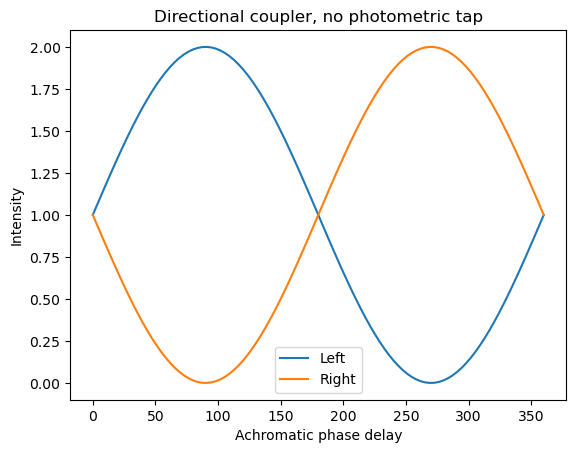

In [38]:
# plot

phase_right_matrix_deg = 180. * phase_right_matrix/np.pi

plt.title('Directional coupler, no photometric tap')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,0], label='Left')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,1], label='Right')
plt.ylabel('Intensity')
plt.xlabel('Achromatic phase delay')
plt.legend()
plt.savefig('junk.png')
#plt.show()

# 1 directional coupler, with photometric taps

In [39]:
# single value

# transfer matrices with photometric splitting
# (see Fig. 2.1 in Klinner-Teo; she calls this M_dirsplitter)

# splitting coefficient of that going into photometric tap at each such split (values for waveguides 1 and 2 assumed the same)
alpha_val = 0.2

# transfer matrix of photometric splitting
# Eqn. 2.4 in Klinner-Teo
M_dirsplit = np.array([[1 - alpha_val,          0               ], 
                        [0,                     1 - alpha_val   ], 
                        [alpha_val,             0               ],
                        [0,                     alpha_val       ]])

# transfer matrix of 
# 1 directional coupler, with photometric tap 
T_dir = np.sqrt(1./2.) * np.array([[1,          phase_term,     0,  0], 
                                   [phase_term, 1,              0,  0],
                                   [0,          0,              1,  0],
                                   [0,          0,              0,  1]])

## output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, 
                 phasor_right])

# flux = | T_dir * M_dirsplit * a_in | ** 2
# dims bookkeeping: [2 x 4] * [4 x 2] * [2 x 1]
flux_output = np.abs(np.dot(T_dir,np.dot(M_dirsplit, a_in)))**2

print(flux_output)

[0.64 0.64 0.02 0.02]


In [40]:
# series of flux values, as fcn of input phase

# transfer matrices with photometric splitting
# (see Fig. 2.1 in Klinner-Teo; she calls this M_dirsplitter)

# splitting coefficient of that going into photometric tap at each such split (values for waveguides 1 and 2 assumed the same)
alpha_val = 0.2

# transfer matrix of photometric splitting
# Eqn. 2.4 in Klinner-Teo
M_dirsplit = np.array([[1 - alpha_val,          0               ], 
                        [0,                     1 - alpha_val   ], 
                        [alpha_val,             0               ],
                        [0,                     alpha_val       ]])

# transfer matrix of 
# 1 directional coupler, with photometric tap 
T_dir = np.sqrt(1./2.) * np.array([[1,          phase_term,     0,  0], 
                                   [phase_term, 1,              0,  0],
                                   [0,          0,              1,  0],
                                   [0,          0,              0,  1]])

## output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right_values = np.linspace(0, 2*np.pi, 100)

phasor_left = amp_left * np.exp(1j * phase_left)

flux_output_matrix = []  # Initialize an empty list
phase_right_list = []  # Initialize an empty list for phase_right values
photometry_output_matrix = []  # Initialize an empty list

for phase_right in phase_right_values:
    phasor_right = amp_right * np.exp(1j * phase_right)
    a_in = np.array([phasor_left, phasor_right])

    # flux = | T_dir * M_dirsplit * a_in | ** 2
    # dims bookkeeping: [2 x 4] * [4 x 2] * [2 x 1]
    flux_output = np.abs(np.dot(T_dir,np.dot(M_dirsplit, a_in)))**2

    flux_output_matrix.append(flux_output)  # Append flux_output to the list
    phase_right_list.append(phase_right)  # Append phase_right to the list

phase_right_matrix = np.array(phase_right_list)
flux_output_matrix = np.array(flux_output_matrix)

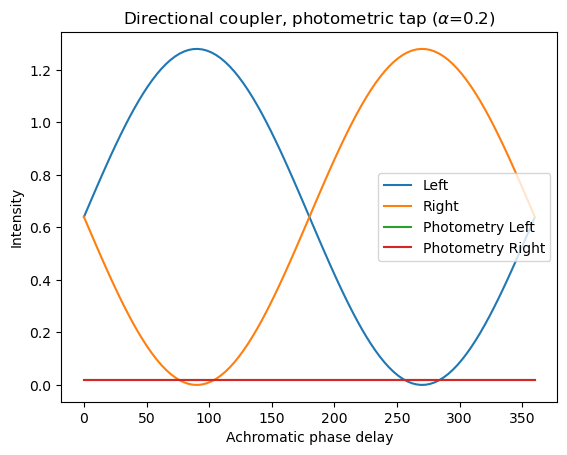

In [41]:
# plot

phase_right_matrix_deg = 180. * phase_right_matrix/np.pi

plt.title('Directional coupler, photometric tap ($\u03B1$='+str(alpha_val)+')')

# plot

phase_right_matrix_deg = 180. * phase_right_matrix/np.pi
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,0], label='Left')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,1], label='Right')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,2], label='Photometry Left')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,3], label='Photometry Right')
plt.ylabel('Intensity')
plt.xlabel('Achromatic phase delay')
plt.legend()
plt.savefig('junk.png')

# 1 tricoupler (2 input apertures), no photometric tap (Martinod, Eqn. 1)

In [5]:
# transfer matrix of 
# 1 tricoupler, no photometric tap (Martinod, Eqn. 1)

phase_shift = 2.*np.pi/3. # induced by phase shifters in waveguides; assumed achromatic; 120 deg = 2*pi/3
phase_term = np.exp(1j * phase_shift) # for matrix

T_tri = np.sqrt(1./3.) * np.array([[1,          phase_term, phase_term], 
                                   [phase_term, 1,          phase_term], 
                                   [phase_term, phase_term, 1]])


In [71]:
# output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, 0, phasor_right])

flux_output = np.abs(np.dot(T_tri, a_in))**2

print(flux_output)


[1.00000000e+00 3.08148791e-33 1.00000000e+00]


In [6]:
# output flux intensities: series of values as fcn of phase_right

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
phasor_left = amp_left * np.exp(1j * phase_left)

amp_right = 1
phase_right_values = np.linspace(0, 2*np.pi, 100)

flux_output_matrix = []  # Initialize an empty list
phase_right_list = []  # Initialize an empty list for phase_right values

for phase_right in phase_right_values:
    phasor_right = amp_right * np.exp(1j * phase_right)
    a_in = np.array([phasor_left, 0, phasor_right])
    flux_output = np.abs(np.dot(T_tri, a_in))**2
    flux_output_matrix.append(flux_output)  # Append flux_output to the list
    phase_right_list.append(phase_right)  # Append phase_right to the list

phase_right_matrix = np.array(phase_right_list)
flux_output_matrix = np.array(flux_output_matrix)


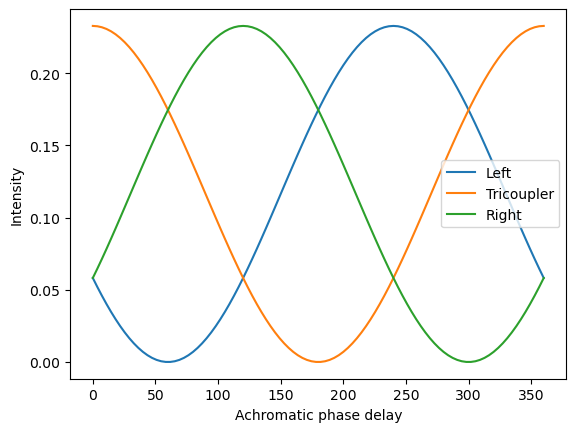

In [32]:
# plot

phase_right_matrix_deg = 180. * phase_right_matrix/np.pi

plt.plot(phase_right_matrix_deg, flux_output_matrix[:,0], label='Left')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,1], label='Tricoupler')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,2], label='Right')
plt.ylabel('Intensity')
plt.xlabel('Achromatic phase delay')
plt.legend()
plt.savefig('junk.png')
#plt.show()

# 1 tricoupler (2 input apertures), with photometric tap

In [27]:
# transfer matrix of 
# 1 tricoupler, with photometric tap (Martinod, Eqn. 1)

# splitting coefficient of that going into photometric tap at each such split (values for waveguides 1 and 2 assumed the same)
alpha_val = 0.2

# transfer matrix of photometric splitting
# Eqn. 2.4 in Klinner-Teo
M_trisplit = np.array([[1 - alpha_val,          0,               0], 
                        [0,                     0,               0],
                        [0,                     0,              1 - alpha_val], 
                        [alpha_val,             0,              0],
                        [0,                     0,              alpha_val]])

phase_shift = 2.*np.pi/3. # induced by phase shifters in waveguides; assumed achromatic; 120 deg = 2*pi/3
phase_term = np.exp(1j * phase_shift) # for matrix

T_tri = np.sqrt(1./11.) * np.array([[1,         phase_term, phase_term, 0, 0], 
                                   [phase_term, 1,          phase_term, 0, 0], 
                                   [phase_term, phase_term, 1         , 0, 0],
                                   [0,          0,          0         , 1, 0],
                                   [0,          0,          0         , 0, 1]])

In [28]:
# output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, 0, phasor_right])

flux_output = np.abs(np.dot(np.dot(T_tri, M_trisplit),a_in))**2

print(flux_output)

[1.74545455e-01 1.54074396e-33 1.74545455e-01 3.63636364e-03
 3.63636364e-03]


In [44]:
# output flux intensities: series of values as fcn of phase_right

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
phasor_left = amp_left * np.exp(1j * phase_left)

amp_right = 1
phase_right_values = np.linspace(0, 2*np.pi, 100)

flux_output_matrix = []  # Initialize an empty list
phase_right_list = []  # Initialize an empty list for phase_right values

for phase_right in phase_right_values:
    phasor_right = amp_right * np.exp(1j * phase_right)
    a_in = np.array([phasor_left, 0, phasor_right])
    flux_output = np.abs(np.dot(np.dot(T_tri, M_trisplit),a_in))**2    
    flux_output_matrix.append(flux_output)  # Append flux_output to the list
    phase_right_list.append(phase_right)  # Append phase_right to the list

phase_right_matrix = np.array(phase_right_list)
flux_output_matrix = np.array(flux_output_matrix)

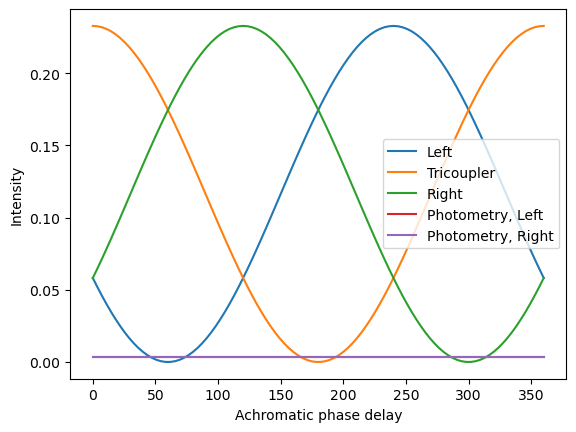

In [46]:
# plot

phase_right_matrix_deg = 180. * phase_right_matrix/np.pi

plt.plot(phase_right_matrix_deg, flux_output_matrix[:,0], label='Left')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,1], label='Tricoupler')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,2], label='Right')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,3], label='Photometry, Left')
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,4], label='Photometry, Right')
plt.ylabel('Intensity')
plt.xlabel('Achromatic phase delay')
plt.legend()
plt.savefig('junk.png')
#plt.show()

# 1 tricoupler (3 input apertures), with photometric taps

In [11]:
# transfer matrix of 
# 3 tricouplers, with photometric taps from each input

# splitting coefficient of that going into photometric tap at each such split (values for waveguides 1 and 2 assumed the same)
alpha_val = 0.2
# splitting coefficients just before coupling stage (note that certain pairs have to sum to 1)
beta_val, gamma_val = 0.4, 0.6
delta_val, omega_val = 0.5, 0.5
eta_val, sigma_val = 0.3, 0.7

# transfer matrix of photometric splitting
M_phot = np.array([[1 - alpha_val,         0,               0], 
                   [0,                     1 - alpha_val,               0],
                   [0,                     0,              1 - alpha_val],
                   [alpha_val,             0,              0],
                   [0,             alpha_val,              0],
                   [0,                     0,              alpha_val]])

# transfer matrix of interferometric splitting
M_interf = np.array([[beta_val,      0,      0,      0,      0,      0], 
                   [0,      0,      0,      0,      0,      0], 
                   [0,      delta_val,      0,      0,      0,      0], 
                   [0,      omega_val,      0,      0,      0,      0], 
                   [0,      0,      0,      0,      0,      0], 
                   [0,      0,      eta_val,      0,      0,      0],
                   [gamma_val,      0,      0,      0,      0,      0],
                   [0,      0,      0,      0,      0,      0],
                   [0,      0,      sigma_val,      0,      0,      0],
                   [0,      0,      0,      1,      0,      0],
                   [0,      0,      0,      0,      1,      0],
                   [0,      0,      0,      0,      0,      1]])

# achromatic phase shifters, now arranged as a matrix
phase_shift_1 = 2.*np.pi/3. # induced by phase shifters for baseline 1 in waveguide; assumed achromatic; 120 deg = 2*pi/3
phase_shift_2 = 2.*np.pi/3. 
phase_shift_3 = 2.*np.pi/3. 
aps_1 = np.exp(1j * phase_shift_1) # achromatic phase shift term
aps_2 = np.exp(1j * phase_shift_2)
aps_3 = np.exp(1j * phase_shift_3)

P_aps = np.array([[1,      0,      0,      0,      0,      0,    0,      0,      0,      0,      0,      0], 
             [0,      1,      0,      0,      0,      0,    0,      0,      0,      0,      0,      0],
             [0,      0,      aps_1,      0,      0,      0,    0,      0,      0,      0,      0,      0],
             [0,      0,      0,      1,      0,      0,    0,      0,      0,      0,      0,      0],
             [0,      0,      0,      0,      1,      0,    0,      0,      0,      0,      0,      0],
             [0,      0,      0,      0,      0,      aps_2,    0,      0,      0,      0,      0,      0],
             [0,      0,      0,      0,      0,      0,    1,      0,      0,      0,      0,      0],
             [0,      0,      0,      0,      0,      0,    0,      1,      0,      0,      0,      0],
             [0,      0,      0,      0,      0,      0,    0,      0,      aps_3,  0,      0,      0],
             [0,      0,      0,      0,      0,      0,    0,      0,      0,      1,      0,      0],
             [0,      0,      0,      0,      0,      0,    0,      0,      0,      0,      1,      0],
             [0,      0,      0,      0,      0,      0,    0,      0,      0,      0,      0,      1]])

T_tri = np.sqrt(1./3.) * np.array([[1,         phase_term, phase_term,     0,          0,          0,          0,          0,          0,          0,                   0,              0], 
                                   [phase_term, 1,          phase_term,     0,          0,          0,          0,          0,          0,          0,                      0,              0],
                                   [phase_term, phase_term, 1         ,     0,          0,          0,          0,          0,          0,          0,                      0,              0],
                                   [0,          0,          0         ,     1,          phase_term, phase_term, 0,          0,          0,          0,                      0,              0],
                                   [0,          0,          0         ,     phase_term, 1,          phase_term, 0,          0,          0,          0,                      0,              0],
                                   [0,          0,          0         ,     phase_term, phase_term, 1,          0,          0,          0,          0,                      0,              0],
                                   [0,          0,          0         ,     0,          0,          0,          1,          phase_term, phase_term, 0,                      0,              0],
                                   [0,          0,          0         ,     0,          0,          0,          phase_term, 1,          phase_term, 0,                      0,              0],
                                   [0,          0,          0         ,     0,          0,          0,          phase_term, phase_term, 1,          0,                      0,              0],
                                   [0,          0,          0         ,     0,          0,          0,          0,          0,          0,          np.sqrt(3.),         0,              0],
                                   [0,          0,          0         ,     0,          0,          0,          0,          0,          0,          0,                      np.sqrt(3.), 0],
                                   [0,          0,          0         ,     0,          0,          0,          0,          0,          0,          0,                      0,              np.sqrt(3.)]])

In [14]:
# one output value only

# incoming complex wavefronts, before any splitting (note these are upstream of the achromatic phase shift; these phases are NOT the APS)
amp_I = 1
phase_I = 0
amp_II = 1
phase_II = 0
amp_III = 1
phase_III = 0

phasor_in_I = amp_I * np.exp(1j * phase_I)
phasor_in_II = amp_II * np.exp(1j * phase_II)
phasor_in_III = amp_III * np.exp(1j * phase_III)

a_in = np.array([phasor_in_I, phasor_in_II, phasor_in_III])

flux_output = np.abs(np.dot(T_tri, 
                            np.dot(P_aps,
                                np.dot(M_interf,   
                                        np.dot(M_phot,a_in)
                                        )
                                )
                        )
                )**2

print(flux_output)

[0.0448     0.0448     0.1728     0.04053333 0.04053333 0.13653333
 0.09173333 0.09173333 0.36053333 0.04       0.04       0.04      ]


In [60]:
# series of output values, as fcn of dialing through the APS

# incoming complex wavefronts, before any splitting (note these are upstream of the achromatic phase shift; these phases are NOT the APS)
amp_I = 1
phase_I = 0
amp_II = 1
phase_II = 0
amp_III = 1
phase_III = 0

phasor_in_I = amp_I * np.exp(1j * phase_I)
phasor_in_II = amp_II * np.exp(1j * phase_II)
phasor_in_III = amp_III * np.exp(1j * phase_III)

a_in = np.array([phasor_in_I, phasor_in_II, phasor_in_III])

phase_aps_list = []  # Initialize an empty list for phase_right values

# the APS matrix here has to be looped (all APSes are being dialed equally here)
phase_aps_array = np.linspace(0, 2*np.pi, 100)
flux_output_matrix = np.zeros((12,len(phase_aps_array)))  # Initialize an array
i = 0 # initial index for flux output row
for phase_aps_val in phase_aps_array:
        # achromatic phase shifters, now arranged as a matrix
        phase_shift_1 = phase_aps_val # induced by phase shifters for baseline 1 in waveguide; assumed achromatic; 120 deg = 2*pi/3
        phase_shift_2 = phase_aps_val 
        phase_shift_3 = phase_aps_val
        phasor_aps_1 = np.exp(1j * phase_shift_1) # achromatic phase shift term
        phasor_aps_2 = np.exp(1j * phase_shift_2)
        phasor_aps_3 = np.exp(1j * phase_shift_3)

        P_aps = np.array([[1,      0,      0,      0,      0,      0,    0,      0,      0,      0,      0,      0], 
                [0,      1,      0,      0,      0,      0,    0,      0,      0,      0,      0,      0],
                [0,      0,      phasor_aps_1,      0,      0,      0,    0,      0,      0,      0,      0,      0],
                [0,      0,      0,      1,      0,      0,    0,      0,      0,      0,      0,      0],
                [0,      0,      0,      0,      1,      0,    0,      0,      0,      0,      0,      0],
                [0,      0,      0,      0,      0,      phasor_aps_2,    0,      0,      0,      0,      0,      0],
                [0,      0,      0,      0,      0,      0,    1,      0,      0,      0,      0,      0],
                [0,      0,      0,      0,      0,      0,    0,      1,      0,      0,      0,      0],
                [0,      0,      0,      0,      0,      0,    0,      0,      phasor_aps_3,  0,      0,      0],
                [0,      0,      0,      0,      0,      0,    0,      0,      0,      1,      0,      0],
                [0,      0,      0,      0,      0,      0,    0,      0,      0,      0,      1,      0],
                [0,      0,      0,      0,      0,      0,    0,      0,      0,      0,      0,      1]])



        flux_output = np.abs(np.dot(T_tri, 
                                np.dot(P_aps,
                                        np.dot(M_interf,   
                                                np.dot(M_phot,a_in)
                                                )
                                        )
                                )
                        )**2
        
        flux_output_matrix[:,i] = flux_output # Append flux_output to the list
        i+=1 # increment i
        phase_aps_list.append(phase_aps_val)  # Append phase_right to the list

        phase_aps_matrix = np.array(phase_aps_list)
        flux_output_matrix = np.array(flux_output_matrix)

In [42]:
flux_output_matrix = np.concatenate(([flux_output_matrix], [flux_output]), axis=0)  

In [61]:
print(np.shape(flux_output))
print(np.shape(flux_output_matrix))


(12,)
(12, 100)


In [50]:
np.shape(flux_output_matrix)

(1212,)

In [19]:
np.shape(flux_output)

(12,)

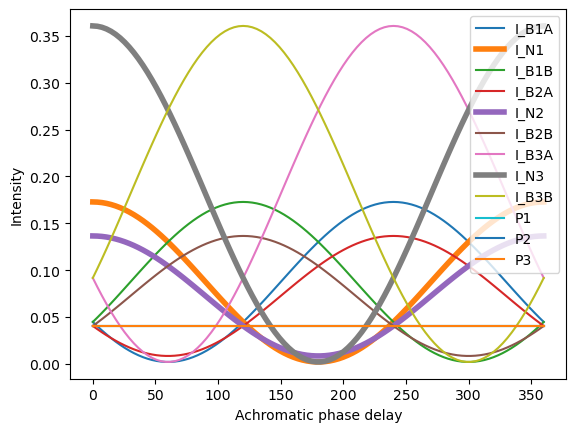

In [66]:
import matplotlib.pyplot as plt

# plot
plt.plot(phase_aps_matrix_deg, flux_output_matrix[0,:], label='I_B1A')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[1,:], label='I_N1', linewidth=4)
plt.plot(phase_aps_matrix_deg, flux_output_matrix[2,:], label='I_B1B')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[3,:], label='I_B2A')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[4,:], label='I_N2', linewidth=4)
plt.plot(phase_aps_matrix_deg, flux_output_matrix[5,:], label='I_B2B')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[6,:], label='I_B3A')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[7,:], label='I_N3', linewidth=4)
plt.plot(phase_aps_matrix_deg, flux_output_matrix[8,:], label='I_B3B')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[9,:], label='P1')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[10,:], label='P2')
plt.plot(phase_aps_matrix_deg, flux_output_matrix[11,:], label='P3')
plt.ylabel('Intensity')
plt.xlabel('Achromatic phase delay')
plt.legend()
plt.show()